In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARMA
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import r2_score



/Users/davidhoffman/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
DIS = "/Users/davidhoffman/desktop/stocks_download/DIS_2006-01-01_to_2018-01-01.csv"
df = pd.read_csv(DIS, index_col="Date", parse_dates=True)

In [3]:
#Only keep closing price of the day
df.drop(['Open','High','Low'], axis = 1, inplace = True)
df.drop(['Name'], axis = 1, inplace = True)
df.drop(['Volume'], axis = 1, inplace = True)

In [4]:
#Seperate into train and test

train = df.Close[:-31]
test = df.Close[len(train)-20:]

In [5]:
#Difference the train set
train_diff = train.diff()

In [6]:
#fit model
ar1ma1 = ARIMA(train_diff.dropna().values, (1,1,1)).fit(disp=0)


/Users/davidhoffman/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/Users/davidhoffman/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


In [7]:
#predict out of sample month ---> test set

preds = ar1ma1.predict(start=len(train)-20,end=len(train)+31)

/Users/davidhoffman/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


In [8]:
#Add predictions to the last value in train set
full_pred = train[len(train)-20]+np.cumsum(preds)

In [9]:
test.shape, full_pred.shape

((51,), (52,))

In [10]:
for i in range(50):
    print (i)
    print ("actual", test[i], "predicted", full_pred[i])
    print ("difference (pred - actual)", full_pred[i]-test[i])

0
actual 98.25 predicted 98.39872139434142
difference (pred - actual) 0.14872139434142184
1
actual 99.01 predicted 97.67065002482434
difference (pred - actual) -1.339349975175665
2
actual 99.4 predicted 97.31570369325576
difference (pred - actual) -2.0842963067442497
3
actual 98.7 predicted 98.05934415611624
difference (pred - actual) -0.6406558438837635
4
actual 98.29 predicted 98.51049243405106
difference (pred - actual) 0.220492434051053
5
actual 97.8 predicted 99.04211836832492
difference (pred - actual) 1.242118368324924
6
actual 98.56 predicted 98.31387331962226
difference (pred - actual) -0.246126680377742
7
actual 98.31 predicted 98.60372003856786
difference (pred - actual) 0.2937200385678551
8
actual 98.04 predicted 98.91363315271276
difference (pred - actual) 0.8736331527127561
9
actual 97.81 predicted 99.18314029740442
difference (pred - actual) 1.3731402974044187
10
actual 99.03 predicted 97.99131195304638
difference (pred - actual) -1.0386880469536237
11
actual 98.35 predi

In [11]:
#create function to predict next weeks prices
#Essentially putting together all the previous cells into one function

def price_preds(df,days, column = 'Close'):
    #df = dataframe
    #column = Close --> predicting closing price
    #days --> how many days do you want to predict
    
    #Seperate into train and test
    train = df.Close[:-days]
    test = df.Close[len(train-1):]
    
    
    #Difference the train set
    train_diff = train.diff()
    
    #fit model
    ar1ma1 = ARIMA(train.values, (1,2,1)).fit(disp=0)
    
    #predict out of sample ---> test set
    preds = ar1ma1.predict(start=len(train), end=len(train)+days-1)

    #Add predictions to the last value in train set
    full_preds = train[len(train)-1] + np.cumsum(preds)
   
    #Set date ticks for graphs
    date_ticks = test.index
    
    fig, ax = plt.subplots(figsize=(12,5))
    ax.plot(date_ticks, test, lw=2, color='grey', ls='dashed',label='Actual')
    ax.plot(date_ticks, full_preds, lw=2, color='darkred',label='Predicted')
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.title("Actual vs predicted price")
    plt.legend()
    plt.show();


/Users/davidhoffman/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/Users/davidhoffman/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/Users/davidhoffman/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


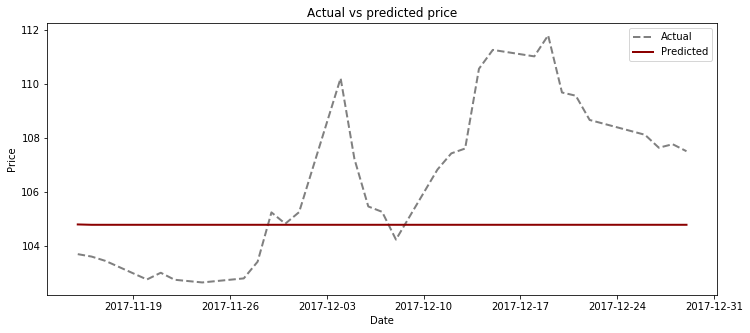

In [12]:
price_preds(df = df, days = 31, column = 'Close')